In [1]:
from IPython.display import Markdown
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [2]:
init_printing()

In [3]:
%matplotlib inline

# MERCADO MUNDIAL COMPETITIVO:

Supongamos un mercado mundial mundial competitivo _[1]_, por un lado tenemos la oferta de cada una de la empresas que forman el mercado y por otro la demanda.

## La Oferta

Tenemos 3 países o sectores, las N empresas de cada país tienen una curva de costes cómo muestra la tabla.

| País  |N empresas|Costes unitarios $C(q_i)$       |
|:---:  |:--------:|:-----------------------------: |
|A      | 100      |$= \frac{q_a^2}{2} + 2q_a + 10$ |
|B      |  50      |$= \frac{q_b^2}{10} + 3q_b + 12$|
|C      | 100      |$= \frac{q_c^2}{2} + 2$         |

## La Demanda

Los consumidores tienen una demanda que depende del precio, y se refleja en la siguiente expresión:

\begin{equation}
Q^D = 98650 - 19350 P
\end{equation}

## Se pide

Hallar:

- Las cantidades producidas ($q_i$)
- Beneficios ($\pi_i$)
- Precio de Equilibrio ($p$)

_[1]: Esto implica que los productores son precio-aceptantes, es decir, que el precio es una variable exógena para los productores._

In [4]:
# Se crean las variables necesarias
qa, qb, qc, q, Qd, P, pi, Q = symbols('q_a q_b q_c q Q^d P p_i Q')

## COSTES

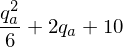

In [5]:
costes_a = qa ** 2 / 6 + 2 * qa + 10
costes_a

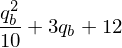

In [6]:
costes_b = qb ** 2 / 10 + 3 * qb + 12
costes_b

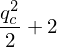

In [7]:
costes_c = qc ** 2 / 2 + 2
costes_c

## DEMANDA

In [8]:
q_dda = 98650 - 19350 * P
q_dda

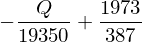

In [9]:
p_dda = solve(Eq(Q, q_dda), P)[-1]
p_dda

## OFERTA

In [10]:
q_oferta = 100 * qa + 50 * qb + 100 * qc

Dados los costes, necesitamos calcular los costes marginales, para eso derivamos la curva de costes de cada tipo empresa usando el método `diff()`. 

Por ejemplo la derivada de los costes de la empresa del país A son:

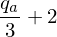

In [11]:
costes_a.diff(qa)

In [12]:
coste_list = [costes_a, costes_b, costes_c]
q_list = [qa, qb, qc]
pais_list = ['a', 'b', 'c']
coste_marginal_list = []

for i in range(len(coste_list)):
    # creamos las variables coste_marginal de cada país
    # como la derivada de sus costes respecto de q.
    fmt = 'coste_marginal_%s'
    cmg_i = coste_list[i].diff(q_list[i])
    globals()[fmt % pais_list[i]] = cmg_i
    coste_marginal_list += [cmg_i]


Lista de costes marginales:

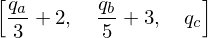

In [13]:
coste_marginal_list

Para hallar la cantidad que se intercambiará en el equilibrio tenemos que igualar los costes marginales y el precio, ¿por qué? si no lo sabes, deja leer y repasa la teoría. Para esto vamos a usar la función para igualar dos expresiones `Eq()`. Para resulver la igualdad tenemos que usar `solve()` y por último necesitaremos sustituir el valor de `P` en la oferta para tener la cantidad:

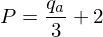

In [14]:
precio_igual_cmg_a = Eq(P, coste_marginal_a)
precio_igual_cmg_a

In [15]:
solucion_a = solve(precio_igual_cmg_a, qa)[-1]
solucion_a

In [16]:
q_oferta_parcial = q_oferta.subs(qa, solucion_a)
q_oferta_parcial

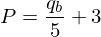

In [17]:
precio_igual_cmg_b = Eq(P, coste_marginal_b)
precio_igual_cmg_b

In [18]:
solucion_b = solve(precio_igual_cmg_b, qb)[-1]
solucion_b

In [19]:
q_oferta_parcial = q_oferta_parcial.subs(qb, solucion_b)
q_oferta_parcial

In [20]:
precio_igual_cmg_c = Eq(P, coste_marginal_c)
precio_igual_cmg_c

In [21]:
solucion_c = solve(precio_igual_cmg_c, qc)[-1]
solucion_c

In [22]:
q_oferta_parcial = q_oferta_parcial.subs(qc, solucion_c)
q_oferta_parcial

In [24]:
# alternativamente lo podemos hacer de forma recursiva con un bucle
q_oferta_tmp = q_oferta.copy()
for i in range(len(coste_list)):
    q_oferta_tmp = q_oferta_tmp.subs(q_list[i], solve(Eq(P, coste_marginal_list[i]), q_list[i])[-1])
    print(q_oferta_tmp)

300*P + 50*q_b + 100*q_c - 600
550*P + 100*q_c - 1350
650*P - 1350


In [25]:
q_oferta_final = q_oferta_parcial

In [26]:
q_oferta_final

In [27]:
precio_equilibrio = solve(Eq(q_dda, q_oferta_final), P)[-1]
precio_equilibrio

In [28]:
q_equilibrio = q_oferta_final.subs(P, precio_equilibrio)
q_equilibrio

## RESUMEN DE VARIABLES EN EL EQUILIBRIO

In [29]:
n_empresas = [100, 50, 100]
q_i = []
Q_i = []
b_i = []
n_i = []

table_fmt = """
|Variables \ Sector       | a | b | c |
|:--    |--:|--:|--:|
|$q =$  |{q_i}|
|$Q =$  |{Q_i}|
|$\pi =$|{b_i}|
"""

for i in range(3):
    qi = solve(Eq(precio_equilibrio, coste_marginal_list[i]), q_list[i])[-1]
    p_igual_cmg = Eq(precio_equilibrio, coste_marginal_list[i])
    b = precio_equilibrio * solve(p_igual_cmg, q_list[i])[-1] - coste_list[i].subs(q_list[i], qi)
    q_i += [qi]
    Q_i += [qi*n_empresas[i]]
    b_i += [b]

display(
    Markdown(
        table_fmt.format(
            q_i="|".join(map(str,q_i)), 
            Q_i="|".join(map(str,Q_i)), 
            b_i="|".join(map(str,b_i)))
    ))


|Variables \ Sector       | a | b | c |
|:--    |--:|--:|--:|
|$q =$  |9|10|5|
|$Q =$  |900|500|500|
|$\pi =$|7/2|-2|21/2|


Despejamos el precio de la oferta para tener la función inversa de demanda:

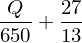

In [30]:
p_oferta = solve(Eq(Q, q_oferta_final), P)[-1]
p_oferta

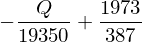

In [31]:
p_dda

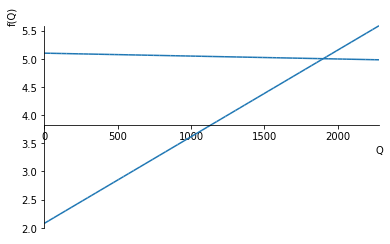

In [32]:
plot(p_dda, p_oferta, (Q, 0, q_equilibrio*1.2));